# Loding Dataset & Tools

In [7]:
import  pandas as pd

In [8]:
file_path = r'E:\Medicine\Dataset\Training.csv'
dataset = pd.read_csv(file_path)

In [9]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [4]:
# vals = dataset.values.flatten()

In [5]:
dataset.shape

(4920, 133)

# Train Test Split

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
print("First few rows of the dataset:")
print(dataset.head())


First few rows of the dataset:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0    

In [16]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']


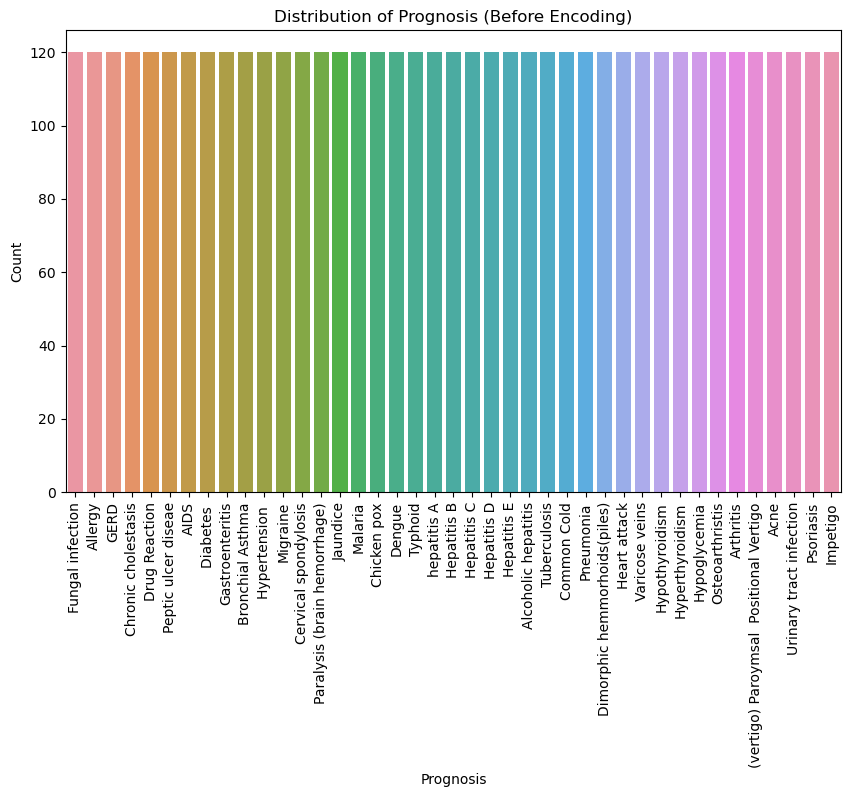

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Distribution of Prognosis (Before Encoding)')
plt.xlabel('Prognosis')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [18]:
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)


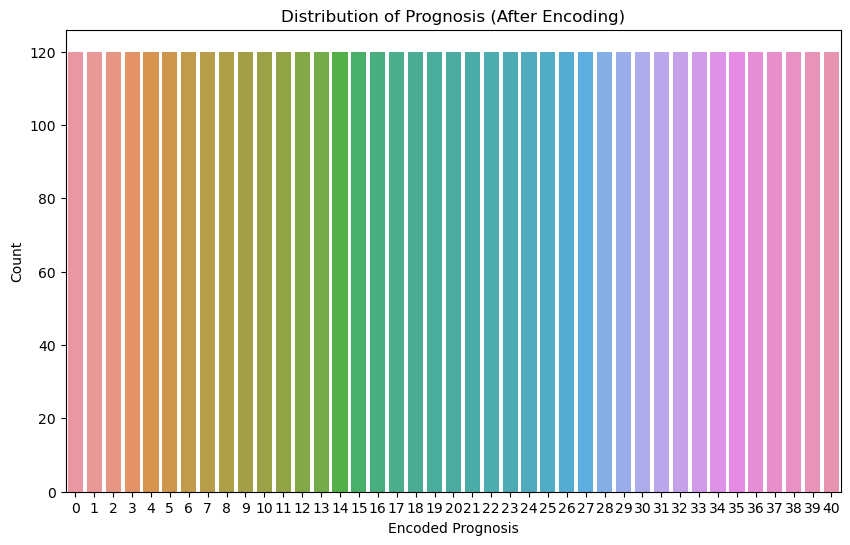

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x=Y)
plt.title('Distribution of Prognosis (After Encoding)')
plt.xlabel('Encoded Prognosis')
plt.ylabel('Count')
plt.show()


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)


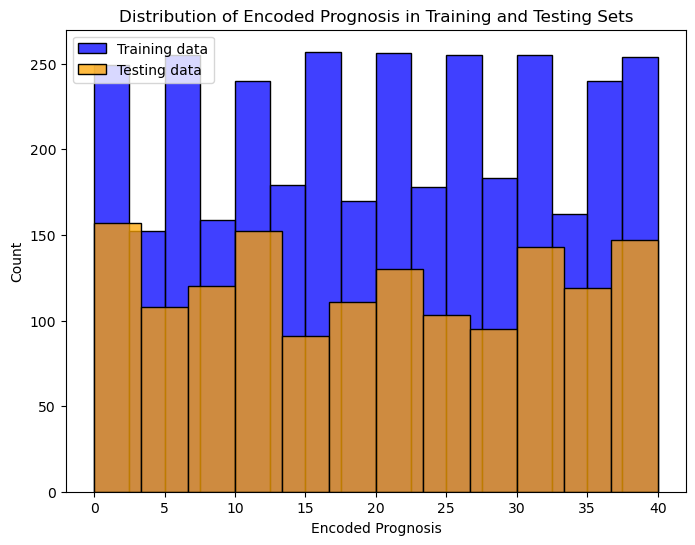

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(y_train, color='blue', label='Training data', kde=False)
sns.histplot(y_test, color='orange', label='Testing data', kde=False)
plt.title('Distribution of Encoded Prognosis in Training and Testing Sets')
plt.xlabel('Encoded Prognosis')
plt.ylabel('Count')
plt.legend()
plt.show()


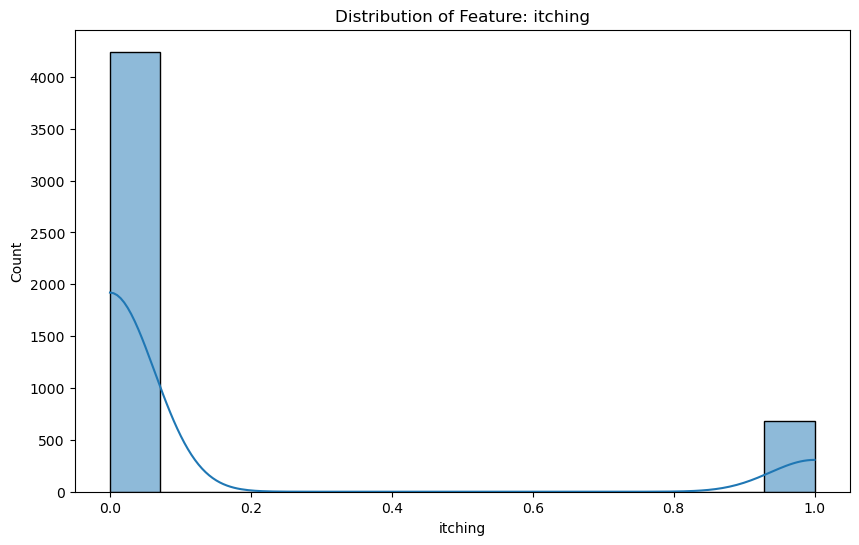

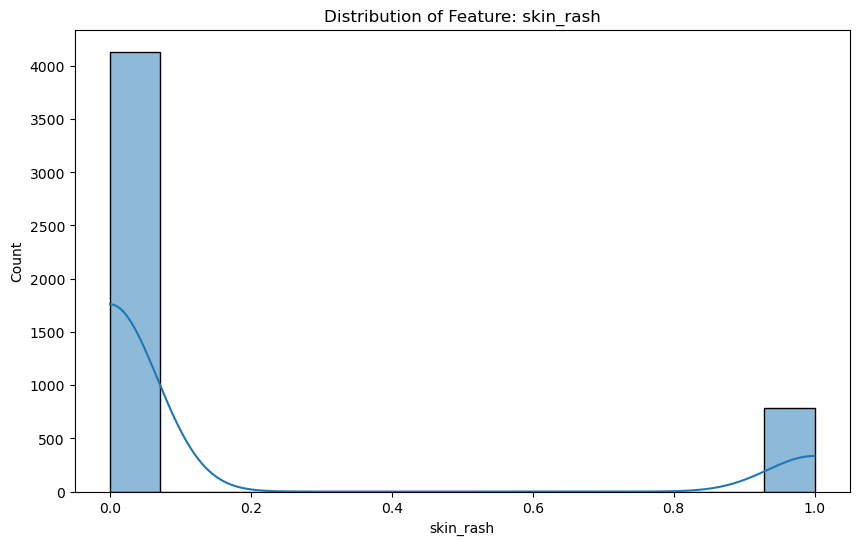

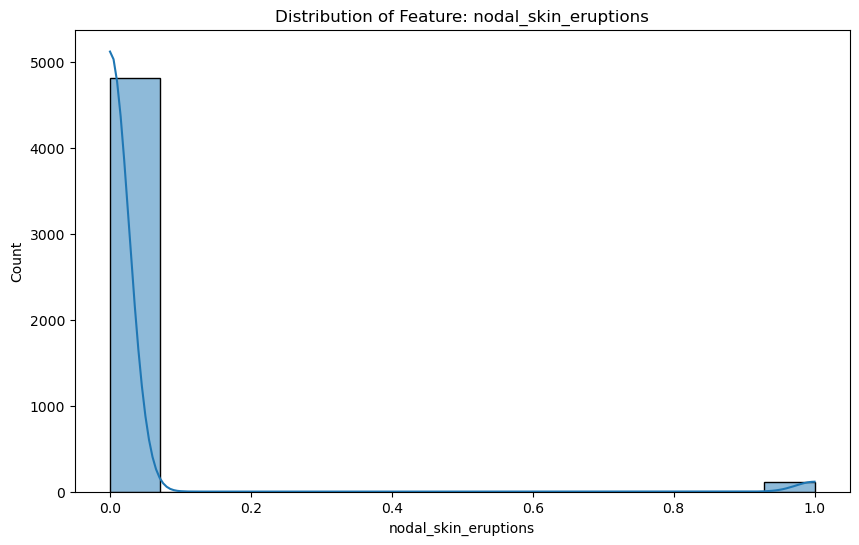

In [22]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
for feature in num_features[:3]:
    plt.figure(figsize=(10, 6))
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of Feature: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [23]:
print("Shapes of the split datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Shapes of the split datasets:
X_train shape: (3444, 132)
X_test shape: (1476, 132)
y_train shape: (3444,)
y_test shape: (1476,)


# Training models

SVC Accuracy: 0.86
SVC Confusion Matrix:
[[127,  18],
 [ 25, 130]]


RandomForest Accuracy: 0.86
RandomForest Confusion Matrix:
[[129,  16],
 [ 27, 128]]


GradientBoosting Accuracy: 0.87
GradientBoosting Confusion Matrix:
[[129,  16],
 [ 23, 132]]


KNeighbors Accuracy: 0.80
KNeighbors Confusion Matrix:
[[124,  21],
 [ 38, 117]]




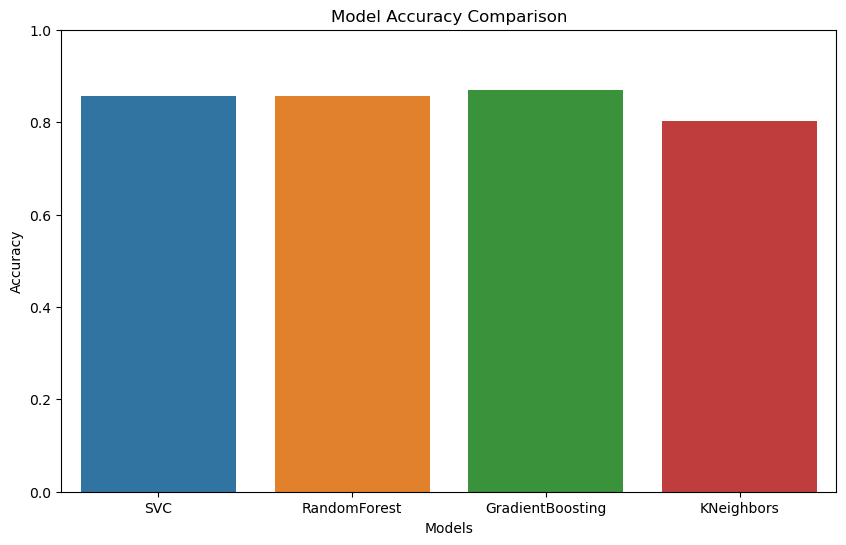

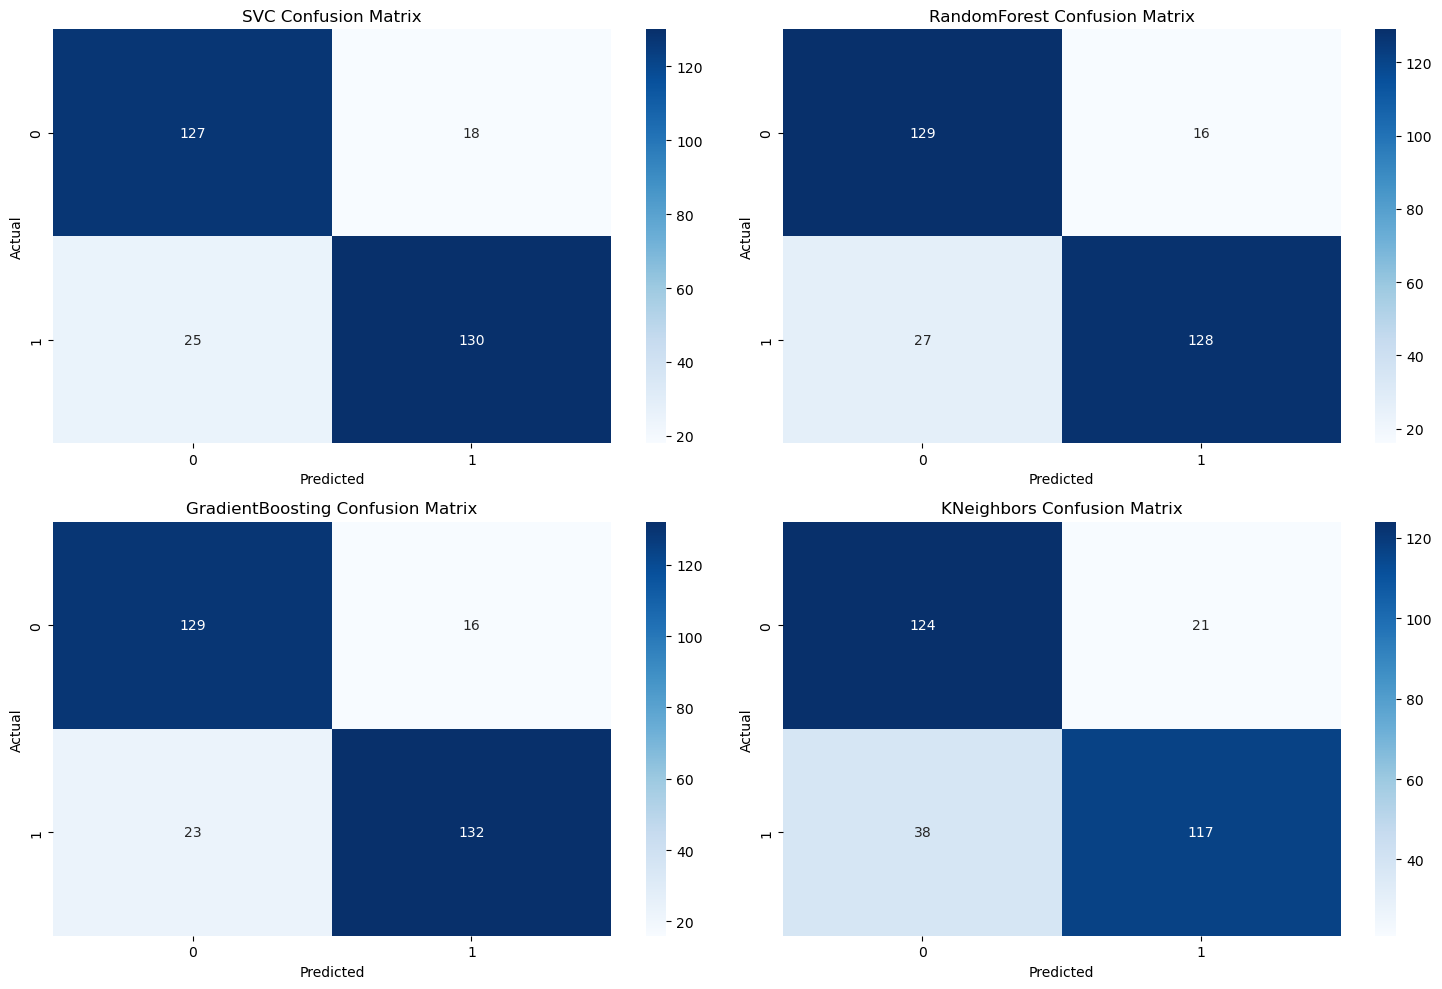

In [24]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}
conf_matrices = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy
    cm = confusion_matrix(y_test, predictions)
    conf_matrices[model_name] = cm

for model_name, accuracy in results.items():
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(conf_matrices[model_name], separator=', '))
    print("\n" + "="*40 + "\n")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


# single prediction

In [36]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

ypred = svc.predict(X_test)

accuracy = accuracy_score(y_test, ypred)
print(f"SVC Accuracy: {accuracy:.2f}")


SVC Accuracy: 0.86


In [37]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [38]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [39]:
from sklearn.svm import SVC
import numpy as np

#test1:
predicted_disease = svc.predict(X_test[[0]].reshape(1, -1))
actual_disease = y_test[0]

print("Predicted disease:", predicted_disease)
print("Actual disease:", actual_disease)


Predicted disease: [1]
Actual disease: 1


In [40]:
# test 2:
print("predicted disease :", svc.predict(X_test[100].reshape(1, -1)))
print("Actual Disease :", y_test[100])

predicted disease : [1]
Actual Disease : 1


# Recommendation System and Prediction

# load database and use logic for recommendations

In [41]:
#import pandas as pd

description_path = r"E:\Medicine\Dataset\description.csv"
diets_path = r"E:\Medicine\Dataset\diets.csv"
medications_path = r"E:\Medicine\Dataset\medications.csv"
precautions_path = r"E:\Medicine\Dataset\precautions_df.csv"
symptom_severity_path = r"E:\Medicine\Dataset\Symptom-severity.csv"
symptoms_path = r"E:\Medicine\Dataset\symtoms_df.csv"
training_path = r"E:\Medicine\Dataset\Training.csv"
workout_path = r"E:\Medicine\Dataset\workout_df.csv"

# Read CSV files into pandas DataFrames
description = pd.read_csv(description_path)
diets = pd.read_csv(diets_path)
medications = pd.read_csv(medications_path)
precautions = pd.read_csv(precautions_path)
symptom_severity = pd.read_csv(symptom_severity_path)
symptoms = pd.read_csv(symptoms_path)
training = pd.read_csv(training_path)
workout = pd.read_csv(workout_path)


In [42]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(20)  # Created a zero vector with 20 elements
    for item in patient_symptoms:
        if item in symptoms_dict:
            input_vector[symptoms_dict[item]] = 1  # Set the corresponding symptom index to 1
    return diseases_list[svc.predict([input_vector])[0]]


In [43]:
# Split the user's input into a list of symptoms (comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms.......itching,skin_rash
=================predicted disease============
(vertigo) Paroymsal  Positional Vertigo
=================description==================

=================precautions==================
1 :  lie down
2 :  avoid sudden change in body
3 :  avoid abrupt head movment
4 :  relax
=================medications==================
=================workout==================
5 :  Avoid trigger foods (caffeine, alcohol)
6 :  Limit sodium intake
7 :  Stay hydrated
8 :  Consume ginger and ginkgo biloba
9 :  Limit artificial sweeteners
10 :  Consult a healthcare professional
11 :  Avoid sudden head movements
12 :  Follow medical recommendations
13 :  Manage stress
14 :  Limit caffeine and stimulants
=================diets==================
